# Interpolación de Newton

Mario Valverde

In [26]:
import pandas as pd
import numpy as np
from sympy import symbols, init_printing, expand, lambdify
import matplotlib.pyplot as plt
from time import time
from random import randint

x = symbols('x')

Definición de las clases para interpolación

In [29]:
class NumMethods:

    def __init__(self, Xs, Ys):
        self.puntosX = Xs
        self.puntosY = Ys
        self.matriz = []
        self.expr = 0

    # def llenarPuntos(self):
    #     numPuntos = int(input('Cuántos puntos vas a ingresar? '))
    #     x = []
    #     y = []
    #     for i in range(numPuntos):
    #         x.append(float(input('x = ')))
    #         y.append(float(input('y = ')))
    #     return x, y

    def NewtonInterpol(self):
        self.matriz.append(self.puntosX)
        self.matriz.append(self.puntosY)
        self.diferenciasFinitas(len(self.puntosX) - 1)
        # print(self.matriz)
        temp = 1
        expr = self.matriz[1][0]
        for i in range(2, len(self.matriz)):
            for j in range(0, i-1):
                temp *= x-self.matriz[0][j]
            expr += self.matriz[i][0]*temp
            temp = 1

        print('polinomio calculado:')
        print(expand(expr))
        self.expr += expr

    def diferenciasFinitas(self, actual):
        if actual == 0:
            return self.puntosY
        self.diferenciasFinitas(actual - 1)
        col = []

        for i in range(len(self.puntosY) - actual):
            fx1 = self.matriz[-1][i+1]
            fx0 = self.matriz[-1][i]
            x1 = self.matriz[0][len(self.matriz) - 1 + i]
            x0 = self.matriz[0][i]
            col.append(self.diferencia(fx1, fx0, x1, x0))
        if not col in self.matriz:
            self.matriz.append(col)
        return col

    def diferencia(self, fx1, fx0, x1, x0):
        return (fx1 - fx0)/(x1-x0)

    def Grafica(self):
        a = np.linspace(min(self.puntosX), max(self.puntosX), 1000)
        b = [self.expr.subs(x, i) for i in a]
        plt.plot(a, b)
        plt.scatter(self.puntosX, self.puntosY)
        plt.show()

## Importamos y procesamos los datos

In [8]:
dataset = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

In [13]:
Xs = dataset['mpg'].tolist()
Ys = dataset['disp'].tolist()


In [32]:
inputs = int(input('Número de puntos: '))
nums = [randint(0, len(Xs)) for i in range(inputs)]

In [18]:
Xs = [Xs[i] for i in nums]
Ys = [Ys[i] for i in nums]

In [21]:
print('Datos de las millas por galón:')
print(Xs)
print('Datos del desplazamiento de los motores\n', Ys)

Datos de las millas por galón:
[15.5, 10.4, 17.8, 18.1, 18.7]
Datos del desplazamiento de los motores
 [318.0, 460.0, 167.6, 225.0, 360.0]


*Haremos una interpolación de el desplazamiento del motor respescto del rendimiento en millas por galón*

## Resolvemos la interpolación

In [33]:
MN = NumMethods(Xs, Ys)
t = time()
MN.NewtonInterpol()
print(f'El tiempo de ejecución fue de {time() - t} segundos')

polinomio calculado:
-3.93360136103481*x**4 + 256.578943578986*x**3 - 6153.18016674436*x**2 + 64080.434444269*x - 243047.395937017
El tiempo de ejecución fue de 0.01795196533203125 segundos


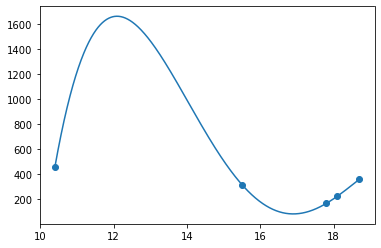

In [34]:
MN.Grafica()